In [25]:
import pandas as pd
import numpy as np

star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

# Cleaning RespondentID

In [26]:
star_wars.shape

(1187, 38)

In [27]:
len(star_wars['RespondentID'].value_counts())

1186

In [28]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]
star_wars.shape

(1186, 38)

# Cleaning Long Yes/No Questions

In [29]:
lq_seen = 'Have you seen any of the 6 films in the Star Wars franchise?'
lq_fan = 'Do you consider yourself to be a fan of the Star Wars film franchise?'

In [30]:
star_wars[lq_seen].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [31]:
star_wars[lq_fan].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [32]:
lq_seen = 'Have you seen any of the 6 films in the Star Wars franchise?'
lq_fan = 'Do you consider yourself to be a fan of the Star Wars film franchise?'
yn_mapper = {'Yes': True, 'No': False}
star_wars[lq_seen] = star_wars[lq_seen].map(yn_mapper)
star_wars[lq_fan] = star_wars[lq_fan].map(yn_mapper)
star_wars[lq_fan].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [33]:
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)
    
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Cleaning Ranking Columns

In [34]:
star_wars.iloc[30:50, 9:15]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
31,4,3,5,6,2,1
32,6,5,4,2,1,3
33,6,1,2,3,4,5
34,6,1,2,3,4,5
35,NaN,NaN,NaN,NaN,NaN,NaN
36,6,3,4,1,2,5
37,3,2,1,4,6,5
38,2,4,5,1,6,3
39,6,3,5,1,4,2
40,4,5,6,3,2,1


In [35]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars.iloc[30:50, 9:15]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
31,4.0,3.0,5.0,6.0,2.0,1.0
32,6.0,5.0,4.0,2.0,1.0,3.0
33,6.0,1.0,2.0,3.0,4.0,5.0
34,6.0,1.0,2.0,3.0,4.0,5.0
35,NaN,NaN,NaN,NaN,NaN,NaN
36,6.0,3.0,4.0,1.0,2.0,5.0
37,3.0,2.0,1.0,4.0,6.0,5.0
38,2.0,4.0,5.0,1.0,6.0,3.0
39,6.0,3.0,5.0,1.0,4.0,2.0
40,4.0,5.0,6.0,3.0,2.0,1.0


# Analyse Population and Ranking of Films

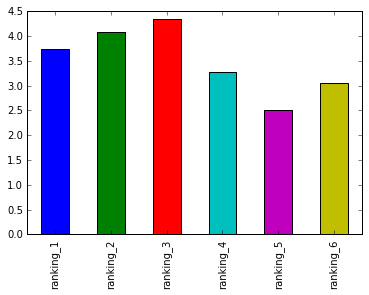

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
star_wars.iloc[:, 9:15].mean().plot.bar(x=0)


Here, the lower the average value, the higher the rank. So, the film V is in ranking 1, and filmn III in ranking 6.

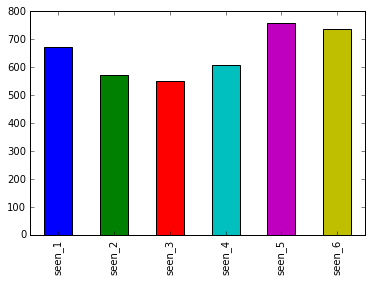

In [39]:
star_wars.iloc[:, 3:9].sum().plot.bar()

This bar chart shows how much popular each film is. So, it is inverse of ranking, and I can see it the ranking 1 film - film V - is the most popular and ranking 6 - film III - is the least popular. 

# Film Favorites for Gender

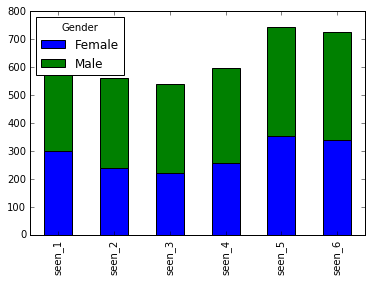

In [56]:
gender_data = (star_wars[['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'Gender']]
               .groupby('Gender')
               .agg(np.sum)
              )
gender_data.reset_index(inplace=False)
gender_data.transpose().plot.bar(stacked=True)

Film populations for women and men are not much different from each other. Guess that wemen watch star wars movies with men :)